### Code to extract and plot spectra from a single NEON AOP pixel

Kristofor Voss 
July 10, 2018 
kvoss@regis.edu 

The goal is to extract a single pixel from a hyperspectral hdf5 file and plot 3 figures, both without the bad bands of unusable data and with those bands. We also want to export a csv of the cleaned wavelength and reflectance. See also http://npk.io/4fDeRC


In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import IPython
%matplotlib inline

In [2]:
refl_filename = ('../data_day2/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5')
refl_filename

'../data_day2/NEON_D17_SJER_DP1_20180401_184649_reflectance.h5'

In [3]:
pixel_to_plot = (100,100)
pixel_to_plot

(100, 100)

In [4]:
# Read in reflectance hdf5 file
hdf5_file = h5py.File(refl_filename, 'r')
hdf5_file

<HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>

In [5]:
# Get the file name
file_attrs_string = str(list(hdf5_file.items()))
file_attrs_string

'[(\'SJER\', <HDF5 group "/SJER" (1 members)>)]'

In [6]:
file_attrs_string_split = file_attrs_string.split("'")
file_attrs_string_split

['[(', 'SJER', ', <HDF5 group "/SJER" (1 members)>)]']

In [7]:
sitename = file_attrs_string_split[1]

In [8]:
# Extract the reflectance
refl = hdf5_file[sitename]['Reflectance']
refl

<HDF5 group "/SJER/Reflectance" (2 members)>

In [9]:
list(refl.attrs)

['Description',
 'Sensor',
 'PayloadID',
 'Scripts',
 'Acquisition_Time',
 'Band_Window_1_Nanometers',
 'Band_Window_2_Nanometers']

In [10]:
#Get the reflectance data
reflData = refl['Reflectance_Data']
reflData

<HDF5 dataset "Reflectance_Data": shape (216, 699, 426), type "<i2">

In [11]:
#Get the raw values for the reflectance data
reflRaw = reflData.value
reflRaw

array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]],

       [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -99

In [12]:
# Create a dictionary containing relevant metadata info 
# make empty dictionary first
metadata = {}
metadata

{}

In [13]:
# store the map_info into a key of the same name
metadata['map_info'] = refl['Metadata']['Coordinate_System']['Map_Info'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0'}

In [14]:
# store the wavelength info into a key of the same name
metadata['wavelength'] = refl['Metadata']['Spectral_Data']['Wavelength'].value
metadata

{'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
         656.941101,  661.951416,  666.

In [15]:
# Extract no data value and store into dict
metadata['data_ignore_value'] = float(reflData.attrs['Data_Ignore_Value'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.910278,  646.920471,  651.930786,
        

In [16]:
#Extract the scale factor
metadata['reflectance_scale_factor'] = float(reflData.attrs['Scale_Factor'])
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  621.86908 ,  626.879395,
         631.889709,  636.900024,  641.9102

In [17]:
# Apply the no data value 

#convert raw reflectance into type float (was integer, see above)
reflClean = reflRaw.astype(float)
reflClean

array([[[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],

       [[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-99

In [18]:
# capture the shape of this raw data 
arr_size = reflClean.shape
arr_size

(216, 699, 426)

In [19]:
number_of_values_where_no_data = np.count_nonzero(reflClean == metadata['data_ignore_value'])
number_of_values_where_no_data

31535502

In [20]:
total_number_of_values_in_arr = (arr_size[0] * arr_size[1] * arr_size[2])
total_number_of_values_in_arr

64319184

In [21]:
# check for number of missing data points
# no result means all clean
if metadata['data_ignore_value'] in reflRaw:
    # print out the percent with no data rounded to 1 decimal place
    print('% of Points with No Data: ', 
          np.round(number_of_values_where_no_data / total_number_of_values_in_arr * 100, 1))
    #replace the ignor values NaNs
    nodata_ind = np.where(reflClean == metadata['data_ignore_value'])
    reflClean[nodata_ind] = np.nan

% of Points with No Data:  49.0


In [23]:
#Apply scale factor
reflArray = reflClean / metadata['reflectance_scale_factor']
reflArray

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [25]:
#Extract spatial extent from attributed
metadata['spatial_extent'] = reflData.attrs['Spatial_Extent_meters']
metadata

{'data_ignore_value': -9999.0,
 'map_info': b'UTM,  1.000,  1.000,  254192.000,  4102883.000,  1.0000000000e+000,  1.0000000000e+000,  11,  North,  WGS-84,  units=Meters, 0',
 'reflectance_scale_factor': 10000.0,
 'spatial_extent': array([ 254192.,  254891., 4102667., 4102883.]),
 'wavelength': array([ 381.375793,  386.385986,  391.396301,  396.406586,  401.416901,
         406.427185,  411.437408,  416.447693,  421.458008,  426.468292,
         431.478485,  436.4888  ,  441.499115,  446.509399,  451.519714,
         456.529907,  461.540192,  466.550507,  471.560791,  476.571106,
         481.581299,  486.591614,  491.601898,  496.612213,  501.622406,
         506.63269 ,  511.643005,  516.65332 ,  521.663574,  526.673828,
         531.684082,  536.694397,  541.704712,  546.715027,  551.72522 ,
         556.735474,  561.745789,  566.756104,  571.766296,  576.776611,
         581.786926,  586.79718 ,  591.807495,  596.817688,  601.828003,
         606.838318,  611.848572,  616.858887,  

In [28]:
#Extract bad band windows
metadata['bad_band_window1'] = (refl.attrs['Band_Window_1_Nanometers'])
metadata['bad_band_window1']


array([1340, 1445])

In [27]:
metadata['bad_band_window2'] = (refl.attrs['Band_Window_2_Nanometers'])
metadata['bad_band_window2']

array([1790, 1955])

In [30]:
metadata['epsg'] = int(refl['Metadata']['Coordinate_System']['EPSG Code'].value)
metadata['epsg']

32611

In [31]:
mapInfo = refl['Metadata']['Coordinate_System']['Map_Info']
mapInfo

<HDF5 dataset "Map_Info": shape (), type "|O">

In [32]:
hdf5_file.close

<bound method File.close of <HDF5 file "NEON_D17_SJER_DP1_20180401_184649_reflectance.h5" (mode r)>>

In [33]:
# Make a new empty pandas dataframe
serc_pixel_df =pd.DataFrame()

In [36]:
#add a column of reflectance data from the cleaned reflectance array
serc_pixel_df['reflectance'] = reflArray[pixel_to_plot[0],pixel_to_plot[1],:]

In [37]:
#add a second column with the wavelength data
serc_pixel_df['wavelengths'] = metadata['wavelength']

In [40]:
#check the dataframe
serc_pixel_df.head(5)

,reflectance,wavelengths
0,0.0233,381.375793
1,0.0326,386.385986
2,0.0337,391.396301
3,0.0359,396.406586
4,0.0347,401.416901


C:\Users\Kris\Anaconda3\envs\py35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


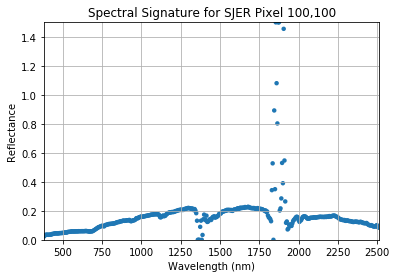

In [44]:
#make a plot 
serc_pixel_df.plot(x='wavelengths',
                   y='reflectance',
                   kind='scatter',
                   edgecolor = 'none')
plt.title('Spectral Signature for '+sitename+' Pixel '+','.join(map(str, pixel_to_plot)))

ax=plt.gca() #gca is short for get current axes

ax.set_xlim(np.min(serc_pixel_df['wavelengths']),
            np.max(serc_pixel_df['wavelengths']))

ax.set_ylim(np.min(serc_pixel_df['reflectance']),
            np.max(serc_pixel_df['reflectance']))

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance")

ax.grid('on')

fig = ax.get_figure()
fig.savefig('./output/figs/'+sitename+'_plot1.png')